# 과대적합(Overfitting), 과소적합(Underfitting)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("test1_modify.csv")

 
X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'minute','dayofweek']]
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

In [2]:
from sklearn.tree import DecisionTreeRegressor as dt # 모든 것을 학습하는 모델

model_dt = dt()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [3]:
model_dt.score(X_train, y_train) # 모든 것을 학습하기 때문에 train 데이터를 넣어주면 정확하게 1로 성능이 나오게 된다.

1.0

In [4]:
model_dt.score(X_test, y_test)

# 일반화 실패 주어진 학습 데이터에 너무 적합하게 학습을 해서 테스트에서는 예측을 잘 못하는 모델이 되었다. -> 과적합

0.8895550884159396

In [5]:
from sklearn.ensemble import RandomForestRegressor as rf

In [6]:
model = rf()
model.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
y_pred = model.predict(X_test) # 모델이 예측한 값
y_pred

array([447.29, 277.71,  15.06, ..., 650.22, 163.19,   5.01])

#### 다양한 회귀문제의 평가지표들
- R(root), M(mean), S(squared), L(log), P(percentile), A(absolute), E(error)
- MAE(Mean absolute Error) : 오차 정보 에러( 에러의 절댓값 씌워서 평균 ) , MSE : 오차 정보 에러 , RMSE : , RMSLE, MAPE

In [8]:
import numpy as np

print(np.log(2) - np.log(1))
print(np.log(1002) - np.log(1001))

# 로그오차 : 작은 값들 끼리의 차이와 큰 값들끼리의 차이에 차등을 두기 위함

0.6931471805599453
0.0009985023295895346


In [9]:
from sklearn.metrics import mean_absolute_error as MAE

MAE(y_test, y_pred)

23.878907254361803

In [10]:
model.predict(X_train)

array([402.51, 188.56, 727.03, ...,   4.73, 129.31, 145.52])

In [11]:
for_plot = pd.DataFrame()
for_plot1 = pd.DataFrame()
for_plot['train_predict'] = model.predict(X_train)
for_plot['train_actual'] = y_train
for_plot1['test_predict'] = model.predict(X_test)
for_plot1['test_actual'] = y_test

<AxesSubplot:xlabel='train_predict', ylabel='train_actual'>

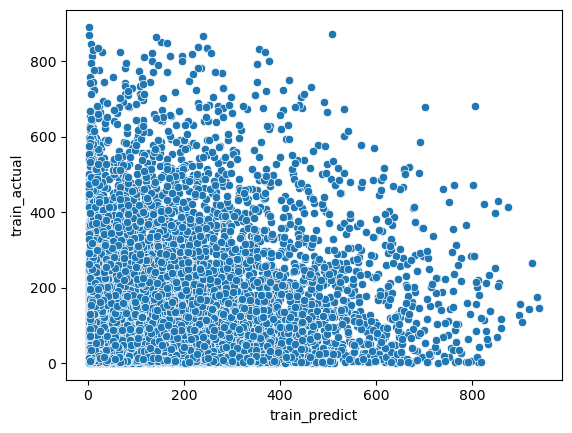

In [12]:
import seaborn as sns

sns.scatterplot(data = for_plot, x = 'train_predict', y = 'train_actual')

<AxesSubplot:xlabel='test_predict', ylabel='test_actual'>

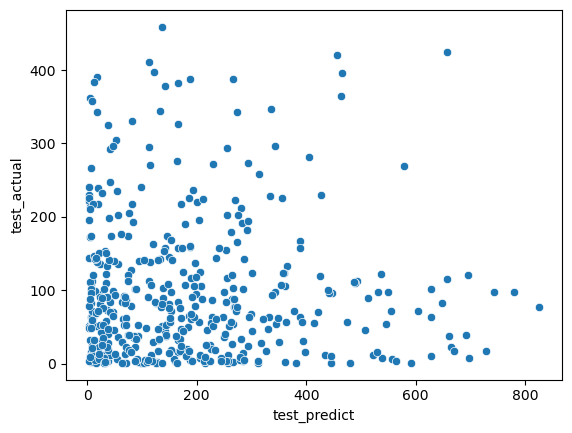

In [13]:
sns.scatterplot(data = for_plot1, x = 'test_predict', y = 'test_actual')

#### 일반화에 실패한 평가지표의 시각화

In [14]:
dt_plot = pd.DataFrame()
dt_plot1 = pd.DataFrame()
dt_plot['train_predict'] = model_dt.predict(X_train)
dt_plot['train_actual'] = y_train
dt_plot1['test_predict'] = model_dt.predict(X_test)
dt_plot1['test_actual'] = y_test

dt_plot.head()

,train_predict,train_actual
0,392.0,16.0
1,191.0,40.0
2,732.0,32.0
3,295.0,13.0
4,237.0,1.0


<AxesSubplot:xlabel='train_predict', ylabel='train_actual'>

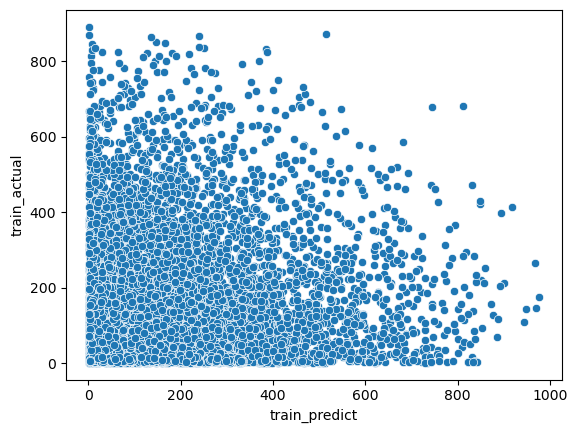

In [15]:
sns.scatterplot(data = dt_plot, x = 'train_predict', y = 'train_actual')

<AxesSubplot:xlabel='test_predict', ylabel='test_actual'>

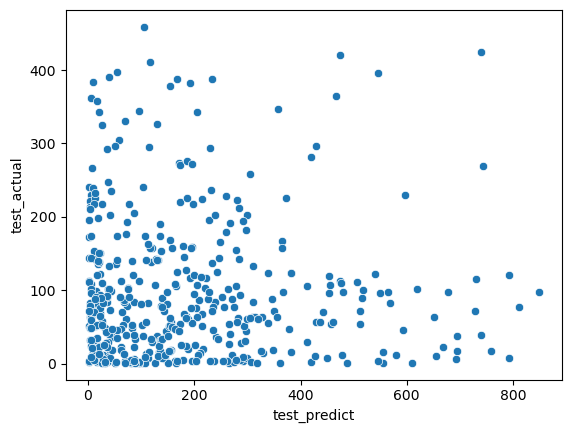

In [16]:
sns.scatterplot(data = dt_plot1, x = 'test_predict', y = 'test_actual')

# feature selection ( 몇 가지만 골라서 분석을 한다. )
- 모든 feature 다 사용하지 않고, 골라서 사용하자. 
- 이러한 featuree selection들을 통해서 과적합을 방지할 수 있으며 컬럼의 개수가 많을 때보다 적을 때 조금 더 효율적인 분석이 가능하지 않을 까? 따라서 중요한 column을 골르는 것도 분석에 있어 중요하다.

- 방법론 3가지 : filter, wrapper, embed

### filter
- 기술통계량을 기반으로 feature들 간 관계에서 높은 상관계수를 가지는 feature를 사용하는 방법 ( 상관계수가 높다면 높은 관계를 가지고 있다고 볼 수 있다.)
- filter 방식이 유효한 경우는 분야마다 따라 다름

In [17]:
df.describe().T.sort_values(by = 'std') # 예를 들어 hoilday의 표준편차가 가장 작으므로 삭제할 수 있다. 

,count,mean,std,min,25%,50%,75%,max
minute,10886.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.0000
sec,10886.0,0.000000,0.000000,0.00,0.0000,0.000,0.0000,0.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
year,10886.0,2011.501929,0.500019,2011.00,2011.0000,2012.000,2012.0000,2012.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
dayofweek,10886.0,3.013963,2.004585,0.00,1.0000,3.000,5.0000,6.0000
month,10886.0,6.521495,3.444373,1.00,4.0000,7.000,10.0000,12.0000
day,10886.0,9.992559,5.476608,1.00,5.0000,10.000,15.0000,19.0000


In [18]:
set(df['holiday'])

{0, 1}

#### Wrapper
- feature들 몇 개씩 빼보고 넣어보고 모델을 분석해보자.
- feature 조합별로 평가 지표 점수를 확인하여 점수가 가장 좋은 조합을 찾아내는 것
- wrapper 방법 : (forward selection(전진), backward selection(하나씩 빼보자), stepwise selection(단계별로) )

In [19]:
X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'minute','dayofweek']]
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)


model = rf()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.952496211468904

In [20]:
X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'minute','dayofweek']] # hour를 제거
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)
model = rf()
model.fit(X_train, y_train)
model.score(X_test, y_test)

# 이를 통해 'hour column은 굉장히 중요한 컬럼임을 알 수 있다. 

0.4467267125849669

In [21]:
from sklearn.feature_selection import RFE

In [22]:
selector = RFE(model)
selector.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor())

In [23]:
ranking = selector.ranking_

In [24]:
Ranking = pd.DataFrame()
Ranking['features'] = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'minute','dayofweek']
Ranking['ranking'] = ranking
Ranking.sort_values(by = 'ranking')

,features,ranking
4,temp,1
5,atemp,1
6,humidity,1
7,windspeed,1
9,month,1
10,day,1
12,dayofweek,2
8,year,3
3,weather,4
0,season,5


# embed
- 어느 정도 신뢰성이 있는 방식이다.
- feature들의 의사결정에 사용된 정도가 있는 경우
- Tree 계열이나 Regularizer가 내부에 있는 경우
- 알고리즘의 공식문서에 Lasso, L1 표현이 있는 경우

In [25]:
fi = model.feature_importances_
# 알고리즘 내부에서 이 feature들이 얼마나 중요하게 쓰여졌나 수치를 비율로 보여준다. 

In [26]:
new = pd.DataFrame()
new["features"] = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'minute','dayofweek']
new['importance'] = fi


new = new.sort_values(by = 'importance', ascending = False)

<AxesSubplot:xlabel='features', ylabel='importance'>

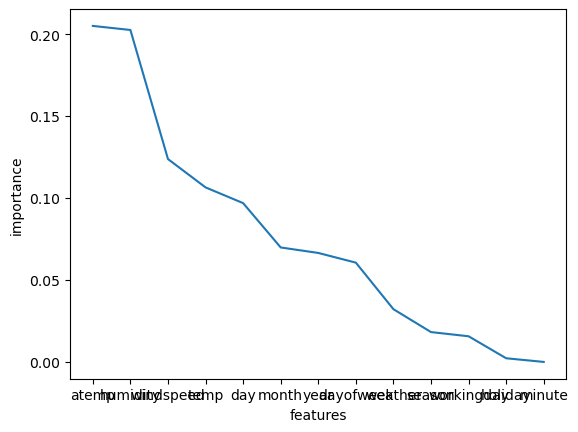

In [27]:
sns.lineplot(data = new, x= 'features', y = 'importance')

<AxesSubplot:xlabel='importance', ylabel='features'>

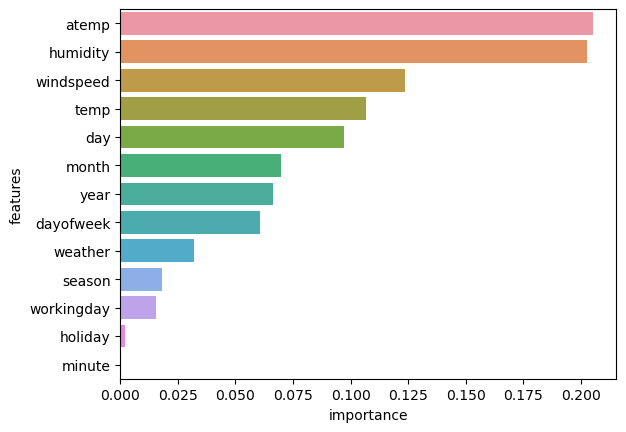

In [28]:
sns.barplot(data = new, x = 'importance', y = 'features')

# rotation? 혹은 figure 사이즈를 늘리는 방법이 있다.